In [1]:
from fbprophet import Prophet
from scipy import stats
import pandas as pd

HOSTED_APP_URL = 'https://iotproject.eu.pythonanywhere.com'
API_PLANT_DATA = '/api/v1/plant_data'

df_orig = pd.read_json(HOSTED_APP_URL + API_PLANT_DATA)

df_orig

,bridge_id,creation_date,dht_humidity,dht_temperature,gateway_id,humidity_1,humidity_2,humidity_3,id,last_modified,luminosity_1,luminosity_2,plant_id,plant_type_id,temperature,timestamp
0,RASPBERRY001,2021-04-02T00:29:21,76,23,ARDUINO001,NaN,NaN,NaN,1,2021-04-01T22:29:21,12,11,c5a3b03d82944886bb1fdb30612d5c5d,1,24.47,1200549
1,RASPBERRY001,2021-04-02T00:39:22,80,23,ARDUINO001,NaN,NaN,NaN,2,2021-04-01T22:39:22,12,11,c5a3b03d82944886bb1fdb30612d5c5d,1,24.47,1800823
2,RASPBERRY001,2021-04-02T00:59:19,81,23,ARDUINO001,NaN,NaN,NaN,3,2021-04-01T22:59:20,13,11,c5a3b03d82944886bb1fdb30612d5c5d,1,24.29,3001370
3,RASPBERRY001,2021-04-01T22:46:47,71,24,ARDUINO001,NaN,NaN,NaN,4,2021-04-01T23:09:21,62,65,c5a3b03d82944886bb1fdb30612d5c5d,1,24.55,600275
4,RASPBERRY001,2021-04-01T22:56:43,74,23,ARDUINO001,NaN,NaN,NaN,5,2021-04-01T23:09:21,63,66,c5a3b03d82944886bb1fdb30612d5c5d,1,24.38,1200548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,RASPBERRY001,2021-04-24T16:29:43,94,21,ARDUINO001,921.0,642.0,809.0,3028,2021-04-24T14:29:44,138,144,43c311e2279f4dd2afce8bbcff62371d,1,19.89,438199999
3028,RASPBERRY001,2021-04-24T16:39:44,95,22,ARDUINO001,920.0,633.0,813.0,3029,2021-04-24T14:39:45,136,143,43c311e2279f4dd2afce8bbcff62371d,1,19.89,438800273
3029,RASPBERRY001,2021-04-24T16:49:46,95,22,ARDUINO001,920.0,628.0,816.0,3030,2021-04-24T14:49:46,137,144,43c311e2279f4dd2afce8bbcff62371d,1,20.15,439400547
3030,RASPBERRY001,2021-04-24T17:12:22,94,21,ARDUINO001,913.0,623.0,812.0,3031,2021-04-24T15:12:23,125,134,43c311e2279f4dd2afce8bbcff62371d,1,19.89,600275


In [2]:
df = df_orig
#df = df.drop(range(1719, 2000))
#df = df.iloc[12:]


In [3]:
humidity = df[['creation_date','humidity_1', 'humidity_2', 'humidity_3']]
humidity.dropna(inplace=True)
humidity

D:\ProgramData\Anaconda3_37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,creation_date,humidity_1,humidity_2,humidity_3
12,2021-04-02T12:16:56,401.0,415.0,318.0
13,2021-04-02T12:36:58,394.0,401.0,311.0
14,2021-04-02T12:46:54,392.0,395.0,309.0
15,2021-04-02T12:07:01,408.0,426.0,325.0
16,2021-04-02T12:26:57,396.0,407.0,313.0
...,...,...,...,...
3027,2021-04-24T16:29:43,921.0,642.0,809.0
3028,2021-04-24T16:39:44,920.0,633.0,813.0
3029,2021-04-24T16:49:46,920.0,628.0,816.0
3030,2021-04-24T17:12:22,913.0,623.0,812.0


<AxesSubplot:>

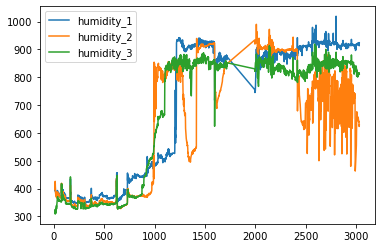

In [4]:
humidity.plot()


In [5]:
# 1718 == ok
# 1719 == garbage

# 1999 == garbage
# 2000 == ok

In [6]:
humidity.dtypes

creation_date     object
humidity_1       float64
humidity_2       float64
humidity_3       float64
dtype: object

In [7]:
prophet_df = pd.DataFrame(columns=['ds', 'y'])
prophet_df['ds'] = pd.to_datetime(humidity['creation_date'])
prophet_df['y'] = humidity[['humidity_1', 'humidity_2', 'humidity_3']].mean(axis=1)


prophet_df

,ds,y
12,2021-04-02 12:16:56,378.000000
13,2021-04-02 12:36:58,368.666667
14,2021-04-02 12:46:54,365.333333
15,2021-04-02 12:07:01,386.333333
16,2021-04-02 12:26:57,372.000000
...,...,...
3027,2021-04-24 16:29:43,790.666667
3028,2021-04-24 16:39:44,788.666667
3029,2021-04-24 16:49:46,788.000000
3030,2021-04-24 17:12:22,782.666667


<AxesSubplot:xlabel='ds'>

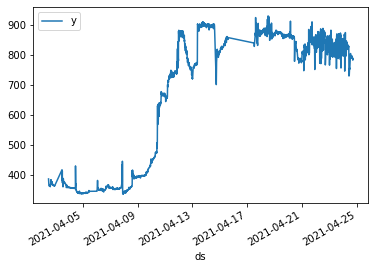

In [8]:
prophet_df.plot(x='ds', y='y')

<AxesSubplot:xlabel='ds'>

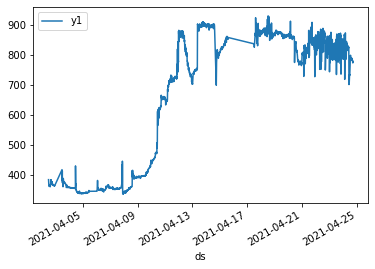

In [9]:
prophet_df['y1'] = stats.gmean(humidity[['humidity_1', 'humidity_2', 'humidity_3']], axis=1)
prophet_df.plot(x='ds', y='y1')

<AxesSubplot:xlabel='ds'>

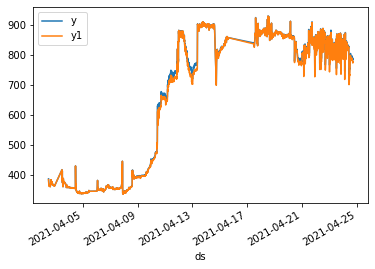

In [10]:
prophet_df.plot(x='ds', y=['y', 'y1'])

<AxesSubplot:xlabel='ds'>

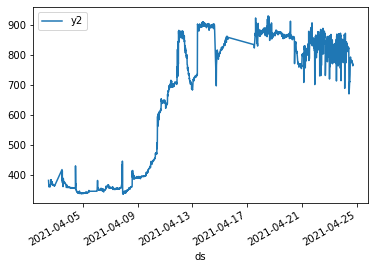

In [11]:
prophet_df['y2'] = stats.hmean(humidity[['humidity_1', 'humidity_2', 'humidity_3']], axis=1)
prophet_df.plot(x='ds', y='y2')


<AxesSubplot:xlabel='ds'>

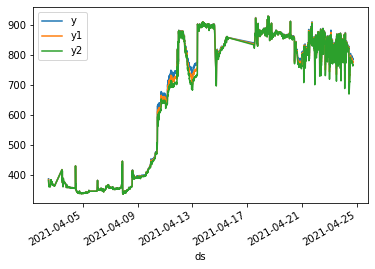

In [12]:
prophet_df.plot(x='ds', y=['y', 'y1', 'y2'])


<AxesSubplot:xlabel='ds'>

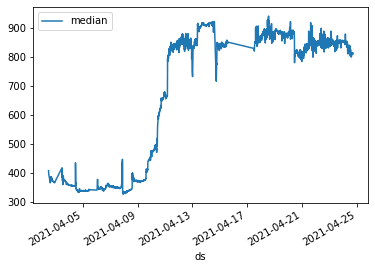

In [13]:
prophet_df['median'] = humidity[['humidity_1', 'humidity_2', 'humidity_3']].median(axis=1)
prophet_df.plot(x='ds', y='median')


<AxesSubplot:xlabel='ds'>

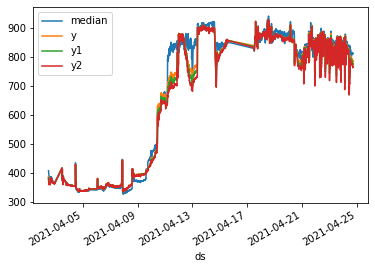

In [14]:
prophet_df.plot(x='ds', y=['median', 'y', 'y1', 'y2'])


In [15]:
prophet_df['h1'] = humidity['humidity_1']
prophet_df['h2'] = humidity['humidity_2']
prophet_df['h3'] = humidity['humidity_3']

<AxesSubplot:xlabel='ds'>

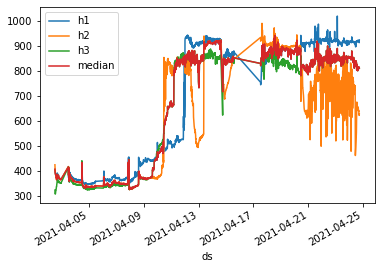

In [16]:
prophet_df.plot(x='ds', y=['h1', 'h2', 'h3', 'median'])

<AxesSubplot:xlabel='ds'>

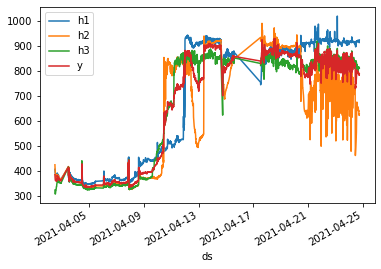

In [17]:
prophet_df.plot(x='ds', y=['h1', 'h2', 'h3','y', ])

<AxesSubplot:xlabel='ds'>

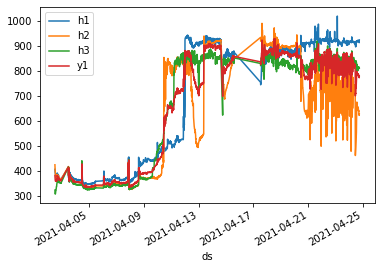

In [18]:
prophet_df.plot(x='ds', y=['h1', 'h2', 'h3','y1', ])

<AxesSubplot:xlabel='ds'>

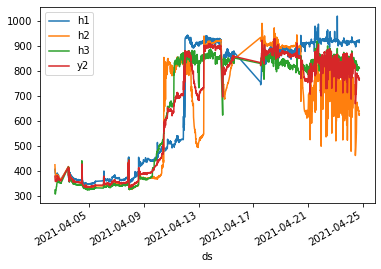

In [19]:
prophet_df.plot(x='ds', y=['h1', 'h2', 'h3','y2', ])

# Median is the better choice since the datapoints to average are only 3


In [20]:
# reset the dataframe,
# since before it was used to experiment what
# function to use as average
prophet_df = pd.DataFrame(columns=['ds', 'y'])
prophet_df['ds'] = pd.to_datetime(humidity['creation_date'])
prophet_df['y'] = humidity[['humidity_1', 'humidity_2', 'humidity_3']].median(axis=1)

In [21]:
# define the model
model = Prophet()
# fit the model
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [22]:
periods = 2 * 24 * 60 // 10  # 2 days worth of 10 minutes intervals
future = model.make_future_dataframe(periods=periods, freq='10min')
future.tail(50)

,ds
2979,2021-04-26 09:12:18
2980,2021-04-26 09:22:18
2981,2021-04-26 09:32:18
2982,2021-04-26 09:42:18
2983,2021-04-26 09:52:18
2984,2021-04-26 10:02:18
2985,2021-04-26 10:12:18
2986,2021-04-26 10:22:18
2987,2021-04-26 10:32:18
2988,2021-04-26 10:42:18


In [23]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-02 12:07:01,364.768287,361.106034,409.972424,364.768287,364.768287,21.989106,21.989106,21.989106,2.784817,2.784817,2.784817,19.204289,19.204289,19.204289,0.0,0.0,0.0,386.757393
1,2021-04-02 12:16:56,364.783397,363.731698,412.869388,364.783397,364.783397,21.890469,21.890469,21.890469,2.800321,2.800321,2.800321,19.090147,19.090147,19.090147,0.0,0.0,0.0,386.673865
2,2021-04-02 12:26:57,364.798658,361.936063,408.647331,364.798658,364.798658,21.786714,21.786714,21.786714,2.813348,2.813348,2.813348,18.973366,18.973366,18.973366,0.0,0.0,0.0,386.585372
3,2021-04-02 12:36:58,364.813920,361.032034,409.277056,364.813920,364.813920,21.679461,21.679461,21.679461,2.824360,2.824360,2.824360,18.855101,18.855101,18.855101,0.0,0.0,0.0,386.493381
4,2021-04-02 12:46:54,364.829055,362.104876,409.917625,364.829055,364.829055,21.570158,21.570158,21.570158,2.833787,2.833787,2.833787,18.736370,18.736370,18.736370,0.0,0.0,0.0,386.399212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,2021-04-26 16:42:18,838.974584,698.957403,930.237034,726.192610,946.767963,-25.439220,-25.439220,-25.439220,1.563215,1.563215,1.563215,-27.002435,-27.002435,-27.002435,0.0,0.0,0.0,813.535364
3025,2021-04-26 16:52:18,838.985934,697.109539,926.641874,725.639769,947.368526,-25.657252,-25.657252,-25.657252,1.412198,1.412198,1.412198,-27.069450,-27.069450,-27.069450,0.0,0.0,0.0,813.328682
3026,2021-04-26 17:02:18,838.997284,696.522708,920.519965,725.086929,947.342640,-25.873068,-25.873068,-25.873068,1.261033,1.261033,1.261033,-27.134101,-27.134101,-27.134101,0.0,0.0,0.0,813.124215
3027,2021-04-26 17:12:18,839.008634,694.337310,925.605921,724.534088,947.516239,-26.084411,-26.084411,-26.084411,1.111955,1.111955,1.111955,-27.196366,-27.196366,-27.196366,0.0,0.0,0.0,812.924223


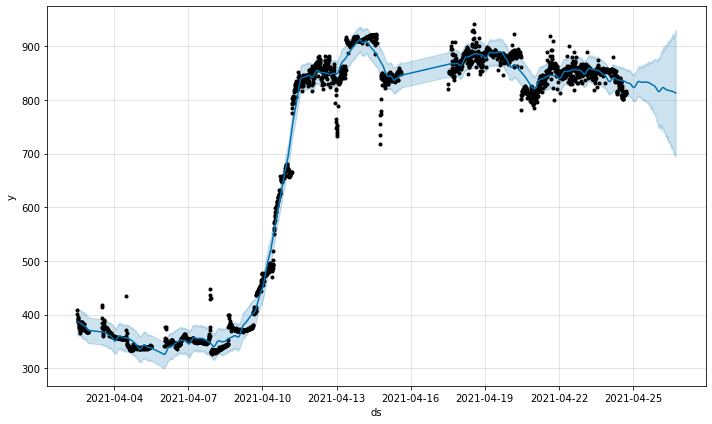

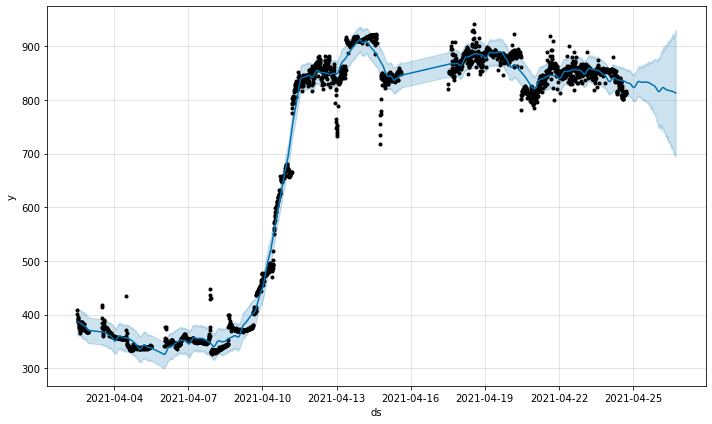

In [24]:
model.plot(forecast)


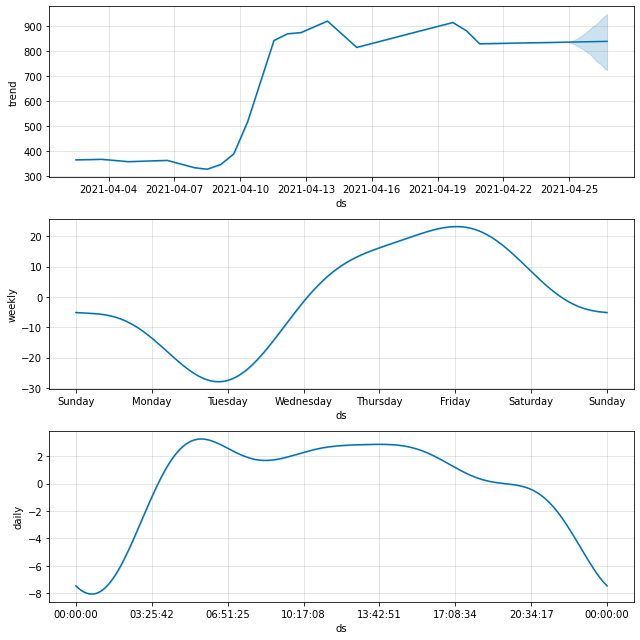

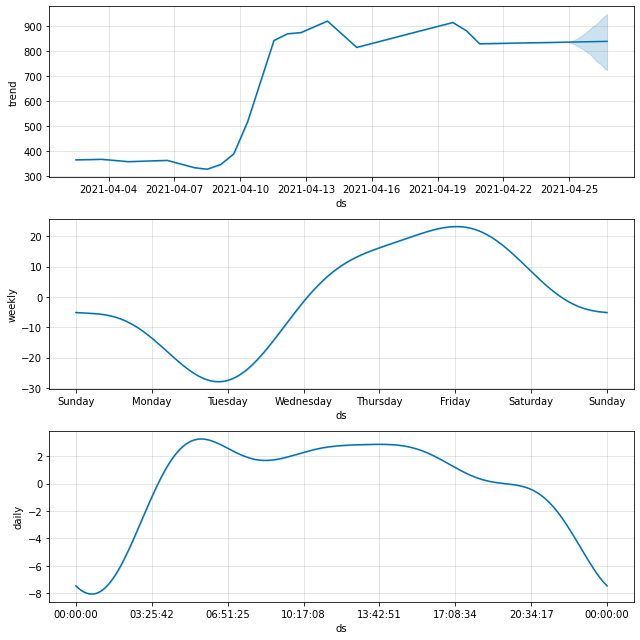

In [25]:
model.plot_components(forecast)



In [26]:
# trying with luminosity
dfl = df_orig
dfl = dfl.iloc[12:]

luminosity = pd.DataFrame(columns=['ds', 'y'])
luminosity['ds'] = pd.to_datetime(dfl['creation_date'])
luminosity['y'] = dfl[['luminosity_1', 'luminosity_2']].median(axis=1)

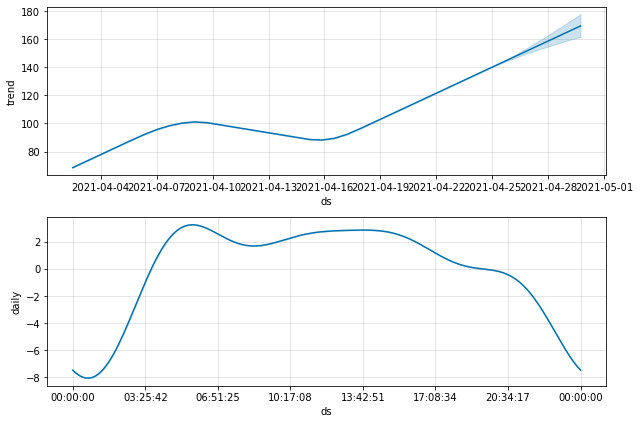

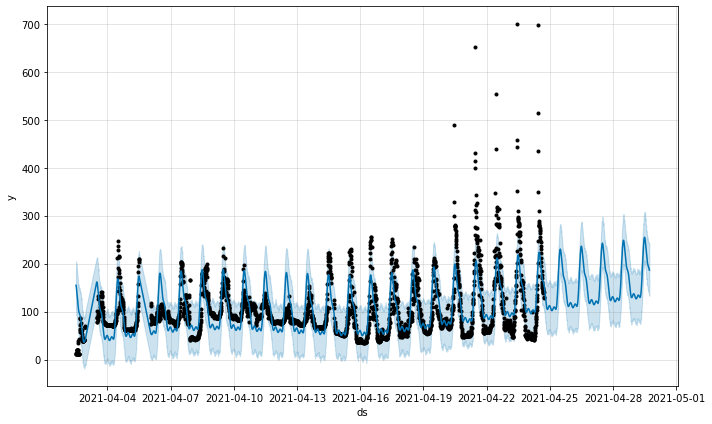

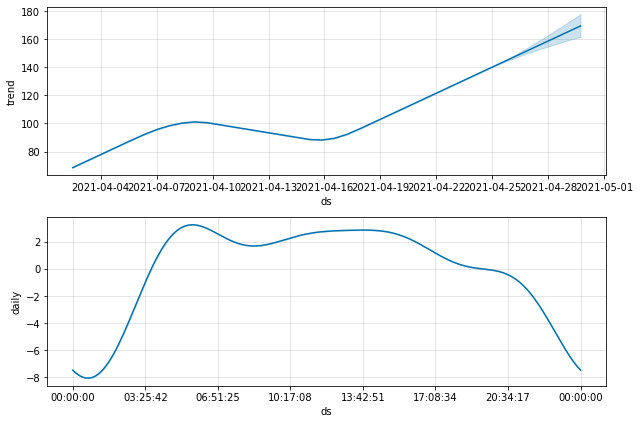

In [27]:
# define the model
model_luminosity = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    changepoint_prior_scale=0.01,
    seasonality_prior_scale=0.5)
# fit the model
model_luminosity.fit(luminosity)

periods = 5 * 24 * 60 // 10  # 2 days worth of 10 minutes intervals
future = model_luminosity.make_future_dataframe(periods=periods, freq='10min')
forecast = model_luminosity.predict(future)
model_luminosity.plot(forecast)
model.plot_components(forecast)

In [28]:
# fai prove di trovare hyperparams